# Projeto Redes

Alexandre Young

Bruno Cesconetto

Lucas Chen Alba

In [1]:
import freeman as fm
import networkx as nx

In [16]:
# Rede two-mode (repos -> linguagens)

repo_g = fm.load('data/repos_langs.gml')
# Visualization
repo_g.set_all_nodes('size', (9))
repo_g.set_all_nodes('labpos', 'hover')

for n in repo_g.nodes:
    if (n.find('/') == -1):
        repo_g.nodes[n]['color'] = (0, 255, 0)
        repo_g.nodes[n]['size'] = (20)
    repo_g.nodes[n]['label'] = n
repo_g.move('bipartite', [n for n in repo_g.nodes if repo_g.nodes[n]['size'] != 20])
repo_g.draw()

In [17]:
# Rede two-mode (devs -> linguagens)
dev_g = fm.load('data/devs_langs.gml')
# Visualization
dev_g.set_all_nodes('size', (9))
dev_g.set_all_nodes('labpos', 'hover')

for n in dev_g.nodes:
    if (n.find('/') != -1):
        dev_g.nodes[n]['color'] = (0, 255, 0)
        dev_g.nodes[n]['size'] = (20)
    dev_g.nodes[n]['label'] = n
dev_g.move('bipartite', [n for n in dev_g.nodes if dev_g.nodes[n]['size'] != 20])
# dev_g.draw()

In [19]:
# Rede one-mode (linguagens a partir dos repos)
onemode_repos_g = fm.load('data/repos_langs_onemode.gml')

# Visualization
onemode_repos_g.set_all_nodes('size', (9))
onemode_repos_g.set_all_nodes('labpos', 'hover')

for n in onemode_repos_g.nodes:
    onemode_repos_g.nodes[n]['label'] = n

onemode_repos_g.move('kamada_kawai')
onemode_repos_g.draw()

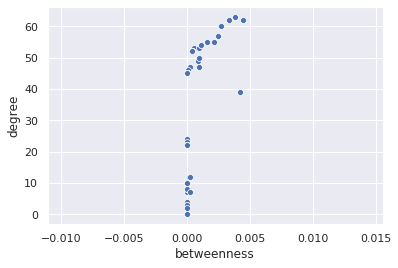

In [38]:
# onemode_repos_g.set_nodedata('repo_name', 'label')

onemode_repos_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('closeness', nx.closeness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('degree', onemode_repos_g.degree)
onemode_repos_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_repos_g))
onemode_repos_g.scaplot_nodes('betweenness', 'degree')

df = onemode_repos_g.nodeframe


In [37]:
df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
1,Python,0.004470,0.252418,62,1.543635e-01
4,Java,0.004187,0.191306,39,7.803282e-02
21,HTML,0.003831,0.255973,63,1.550247e-01
6,Shell,0.003345,0.252418,62,1.546962e-01
17,CSS,0.002669,0.245596,60,1.538403e-01
...,...,...,...,...,...
103,LOLCODE,0.000000,0.000000,0,5.337537e-15
104,F#,0.000000,0.000000,0,5.337537e-15
105,Visual Basic,0.000000,0.000000,0,5.337537e-15
106,Ada,0.000000,0.000000,0,5.337537e-15


In [36]:
df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
21,HTML,0.003831,0.255973,63,1.550247e-01
6,Shell,0.003345,0.252418,62,1.546962e-01
1,Python,0.004470,0.252418,62,1.543635e-01
17,CSS,0.002669,0.245596,60,1.538403e-01
30,Objective-C,0.002468,0.236027,57,1.522114e-01
...,...,...,...,...,...
129,HCL,0.000000,0.000000,0,5.337537e-15
130,Red,0.000000,0.000000,0,5.337537e-15
131,ANTLR,0.000000,0.000000,0,5.337537e-15
132,PostScript,0.000000,0.000000,0,5.337537e-15


In [35]:
df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
21,HTML,0.003831,0.255973,63,1.550247e-01
6,Shell,0.003345,0.252418,62,1.546962e-01
1,Python,0.004470,0.252418,62,1.543635e-01
17,CSS,0.002669,0.245596,60,1.538403e-01
30,Objective-C,0.002468,0.236027,57,1.522114e-01
...,...,...,...,...,...
129,HCL,0.000000,0.000000,0,5.337537e-15
130,Red,0.000000,0.000000,0,5.337537e-15
131,ANTLR,0.000000,0.000000,0,5.337537e-15
132,PostScript,0.000000,0.000000,0,5.337537e-15


In [39]:
# Rede one-mode (linguagens a partir dos devs)

onemode_devs_g = fm.load('data/devs_langs_onemode.gml')

# Visualization
onemode_devs_g.set_all_nodes('size', (15))
onemode_devs_g.set_all_nodes('labpos', 'hover')

for n in onemode_devs_g.nodes:
    onemode_devs_g.nodes[n]['label'] = n

# onemode_devs_g.move('bipartite', [n for n in onemode_devs_g.nodes if onemode_devs_g.nodes[n]['size'] != 20])
onemode_devs_g.move('kamada_kawai')

# onemode_devs_g.draw()

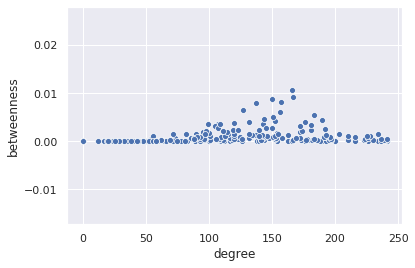

In [44]:
onemode_devs_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('closeness', nx.closeness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('degree', onemode_devs_g.degree)
# onemode_devs_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_devs_g))
onemode_devs_g.scaplot_nodes('degree', 'betweenness')

dev_df = onemode_devs_g.nodeframe



In [45]:
dev_df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree
155,XSLT,0.010693,0.494270,166
146,PLSQL,0.009197,0.501427,167
164,Smarty,0.008853,0.497493,150
129,HCL,0.008246,0.436660,157
196,PLpgSQL,0.007997,0.529863,137
...,...,...,...,...
174,Liquid,0.000000,0.309384,20
170,UrWeb,0.000000,0.198029,35
167,Jasmin,0.000000,0.340592,43
166,Objective-J,0.000000,0.337419,43


In [46]:
dev_df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree
230,LiveScript,0.002049,0.532615,111
196,PLpgSQL,0.007997,0.529863,137
180,Scilab,0.002449,0.503300,123
146,PLSQL,0.009197,0.501427,167
204,GAP,0.003613,0.498427,109
...,...,...,...,...
80,+,0.000000,0.000000,0
7,None,0.000000,0.000000,0
83,L,0.000000,0.000000,0
79,B,0.000000,0.000000,0


In [47]:
dev_df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree
2,JavaScript,0.000034,0.008097,241
1,Python,0.000034,0.004049,241
21,HTML,0.000470,0.080972,241
6,Shell,0.000168,0.024291,241
17,CSS,0.000372,0.064777,240
...,...,...,...,...
82,U,0.000000,0.000000,0
81,N,0.000000,0.000000,0
79,B,0.000000,0.000000,0
7,None,0.000000,0.000000,0



H1: As linguagens mais influentes de um repositório, serão vistas nos repositórios de seus contribuidores.



Experiência de um desenvolvedor em relação às linguagens, comparar isso com o grafo existênte de linguagens que são vistas juntas